In [1]:
import sys
if not sys.argv[1] == "-f":
    path = sys.argv[1]
    IF = "01"
    mode = "commandline"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    path = "/home/amigos/hdd/data/observation/otf_planet2018/n20190928012625_12CO_2-1_otfplanet_jupiter"
    path = "/home/amigos/hdd/data/observation/otf_planet2018/n20191001142537_12CO_2-1_otfplanet_sun"
    path2 = "/home/amigos/hdd/data/observation/otf_planet2018/n20191001144255_12CO_2-1_otfplanet_sun"
    path2 = "/home/amigos/hdd/data/observation/otf_planet2018/n20191001150019_12CO_2-1_otfplanet_sun"
    mode = "notebook"

In [2]:
path

'/home/amigos/hdd/data/observation/otf_planet2018/n20191001142537_12CO_2-1_otfplanet_sun'

In [3]:
import necstdb
import numpy
import matplotlib.pyplot as plt
import os
import pandas
from datetime import datetime as dt

In [4]:
import sys
sys.path.append("/home/amigos/git/analy_n2data/script")

In [6]:
# iflist = ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]
import make_dset
# #dlist = []
# #"04"は4IF目のこと。11IF目なら"11"
# #for i in iflist:
IF = "01"
d, data, total_p = make_dset.get_data(path, IF)
d = numpy.array(d)
data = numpy.array(data)
xffts_data = data.T[2:].T
# # dlist.append(xffts_data)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


100%|██████████| 4/4 [00:00<00:00, 215.48it/s]

['0.0']
['0.0']
 0.0
 1.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
 9.0
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
[ True  True  True ...,  True  True  True]
[False False False ..., False False False]
9.0 OFF 0.0 0.0
[ True  True  True ...,  True  True  True]
[False False False .

In [103]:
# enc_az = data.T[3]
# enc_el = data.T[4]
# enc_time = data.T[0]

In [104]:
# plt.plot(d.T[0])
# plt.show()
# onmask = d.T[0] == "ON"

In [7]:
n = necstdb.opendb(path)
n2 = necstdb.opendb(path2)

In [8]:
nn = n.open_table("status_encoder")
nn2 = n2.open_table("status_encoder")

In [9]:
enc = nn.read()
enc = numpy.array(enc)
enc2 = nn2.read()
enc2 = numpy.array(enc2)

In [10]:
enc_az = enc.T[1].astype(numpy.float64)
enc_el = enc.T[2].astype(numpy.float64)
enc_time = enc.T[4].astype(numpy.float64)

enc_az2 = enc2.T[1].astype(numpy.float64)
enc_el2 = enc2.T[2].astype(numpy.float64)
enc_time2 = enc2.T[4].astype(numpy.float64)

In [11]:
dtime_list = [dt.utcfromtimestamp(i) for i in enc_time]
dtime_list2 = [dt.utcfromtimestamp(i) for i in enc_time2]

In [12]:
from astropy.coordinates import get_body, AltAz, EarthLocation, SkyCoord
import astropy.units as u
from datetime import datetime as dt
from astropy.time import Time
nanten2 = EarthLocation(lat = -22.96995611*u.deg, lon = -67.70308139*u.deg, height = 4863.85*u.m)
import kisa_rev
import calc_coord
from numpy import deg2rad

In [13]:
target_list = get_body("sun", Time(dtime_list))
target_list2 = get_body("sun", Time(dtime_list2))

In [14]:
target_list.location = nanten2
target_list2.location = nanten2

In [15]:
planet_az = target_list.altaz.az.deg
planet_el = target_list.altaz.alt.deg

planet_az2 = target_list2.altaz.az.deg
planet_el2 = target_list2.altaz.alt.deg

In [16]:
dd2 = [kisa_rev.apply_kisa_test(deg2rad(planet_az[i]), deg2rad(planet_el[i]), "/home/amigos/ros/src/necst/lib/hosei_230.txt") for i in range(len(planet_az))]

In [17]:
dd2_2 = [kisa_rev.apply_kisa_test(deg2rad(planet_az2[i]), deg2rad(planet_el2[i]), "/home/amigos/ros/src/necst/lib/hosei_230.txt") for i in range(len(planet_az2))]

In [18]:
dd2 = numpy.array(dd2)
dd2_2 = numpy.array(dd2_2)

In [19]:
# hosei_enc_az = enc_az/3600 + dd2.T[0]/3600
# hosei_enc_el = enc_el/3600 + dd2.T[1]/3600

# hosei_enc_az2 = enc_az2/3600 + dd2_2.T[0]/3600
# hosei_enc_el2 = enc_el2/3600 + dd2_2.T[1]/3600
len(planet_az)
len(dd2)

35281

In [20]:
hosei_planet_az = planet_az - dd2.T[0]/3600
hosei_planet_el = planet_el - dd2.T[1]/3600
hosei_planet_az2 = planet_az2 - dd2_2.T[0]/3600
hosei_planet_el2 = planet_el2 - dd2_2.T[1]/3600

In [21]:
# len(hosei_enc_az)
# dd2.T[1]/3600


<IPython.core.display.Javascript object>


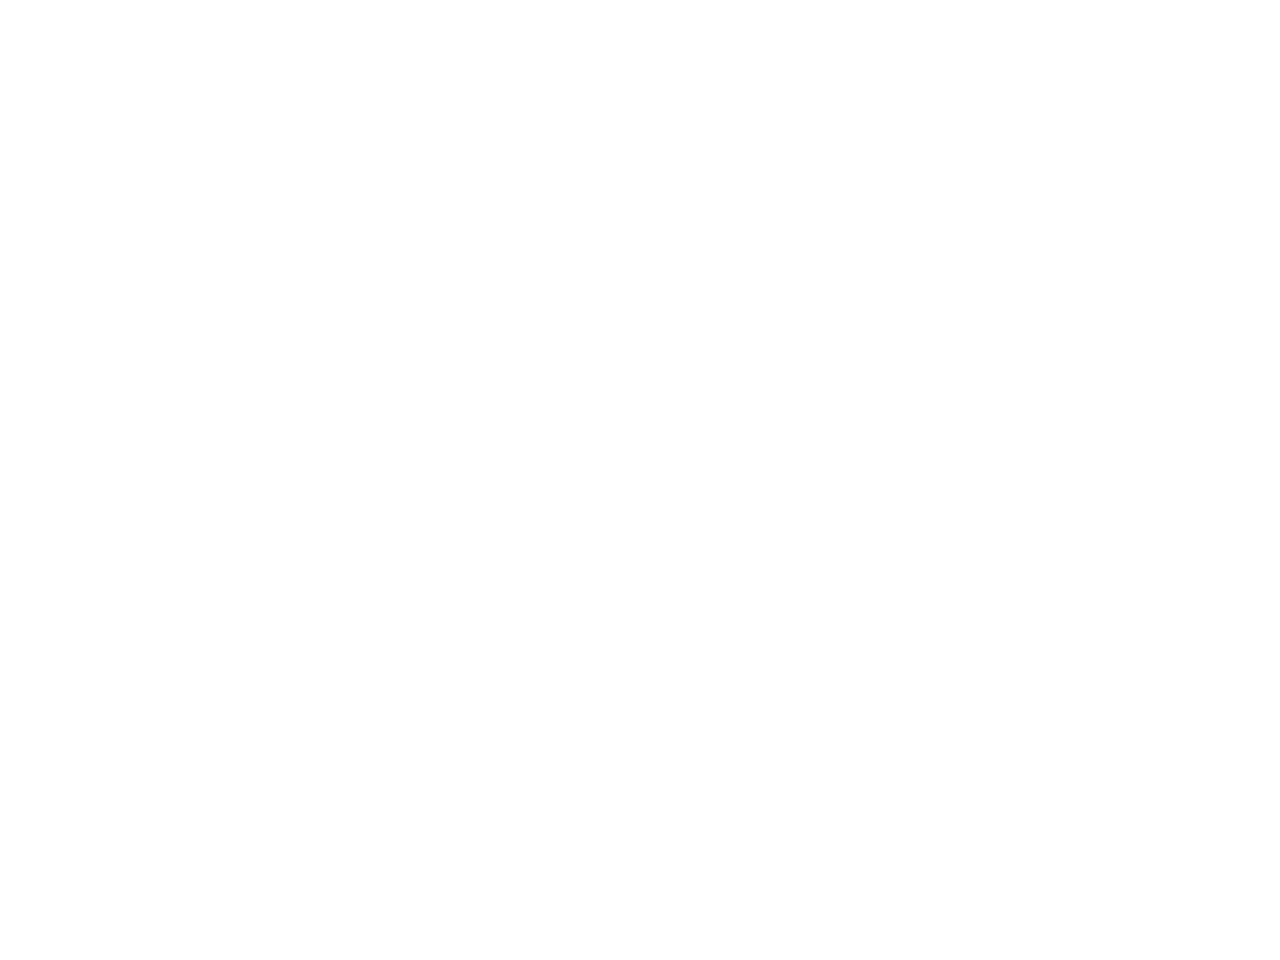

In [22]:
%matplotlib notebook
#plt.plot(hosei_enc_az, hosei_enc_el, ".")
# plt.plot(hosei_planet_az - enc_az/3600, hosei_planet_el - enc_el/3600, ".", alpha=0.01)
# plt.plot(hosei_planet_az - enc_az/3600, hosei_planet_el - enc_el/3600)
plt.plot(hosei_planet_az2 - enc_az2/3600, hosei_planet_el2 - enc_el2/3600, ".", alpha=0.01)
plt.plot(hosei_planet_az2- enc_az2/3600, hosei_planet_el2 - enc_el2/3600)
#plt.plot(enc_az/3600, enc_el/3600, ".")
# plt.plot(hosei_enc_az - planet_az, hosei_enc_el- planet_el, ".")
# plt.plot(hosei_enc_az - planet_az , hosei_enc_el - planet_el)
# plt.plot(hosei_enc_az2 - planet_az2, hosei_enc_el2- planet_el2, ".")_
# plt.plot(hosei_enc_az2 - planet_az2, hosei_enc_el2 - planet_el2)
#plt.plot(enc_az - planet_az , enc_el - planet_el, ".")
#plt.plot(hosei_enc_az  , hosei_enc_el,  ".")
#plt.plot(planet_az, planet_el, ".")
plt.grid()
plt.xlabel("Az (deg)")
plt.ylabel("El (deg)")
# plt.xlim(-1,1)
# plt.ylim(-1,1)
plt.show()

In [24]:
obs_mode = d.T[0]

NameError: name 'd' is not defined

In [ ]:
hotmask = obs_mode == "HOT"
offmask = obs_mode == "OFF"
onmask = obs_mode == "ON"

In [ ]:
hot = numpy.mean(xffts_data[hotmask], axis=0)
off = numpy.mean(xffts_data[offmask], axis=0)
on = numpy.mean(xffts_data[onmask], axis=0)

In [ ]:
def chopper_wheel(on, off, hot, temprature = 300):
    Tastar = temprature * (on - off)/(hot - off)
    return Tastar

In [ ]:
Tlist = []
for i  in dlist:
    hot = numpy.mean(i[hotmask], axis=0)
    off = numpy.mean(i[offmask], axis=0)
    on = numpy.mean(i[onmask], axis=0)
    T = chopper_wheel(on, off, hot)
    Tlist.append(T)

In [ ]:
numpy.shape(Tlist)

In [ ]:
# x = numpy.linspace(0, 2000, 32768)#XFFTS bw = 0-2000MHz
# fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# ax[0].plot(x, T)
# #ax[0].set_xlim(xmin, xmax)
# #ax[0].set_ylim(ymin, ymax)
# ax[0].grid(True)
# ax[0].set_xlabel("MHz")
# ax[0].set_ylabel("T [K]")
# ax[0].set_title("Spectra Plot")

# ax[1].plot(x, on, label="ON")
# ax[1].plot(x, off, label="OFF")
# ax[1].plot(x, hot, label="HOT")
# # ax[1].set_xlim(-1500, -1200)
# # ax[1].set_ylim(3000,10000)
# ax[1].set_xlabel("MHz")
# ax[1].set_ylabel("Count")
# ax[1].grid(True)
# ax[1].legend()
# #ax[1].set_yscale("log")
# ax[1].set_title("band chracter plot")

# result_path = path.replace("data", "analysis")
# if not os.path.exists(result_path):
#     os.makedirs(result_path, exist_ok=True)
# plt.savefig(os.path.join(result_path, "result_IF{}.png".format(IF)))
# if mode == "notebook":
#     plt.show()

In [ ]:
fig = plt.figure(figsize=(16,16))
ax = [fig.add_subplot(4, 4, i+1) for i in range(16)]
x = numpy.linspace(0, 2000, 32768)#XFFTS bw = 0-2000MHz
    
# plot hot
for i, (_ax, _tsys) in enumerate(zip(ax, Tlist)):
    _ax.plot(x, Tlist[i], "b-", label="hot")
    #_ax0 = _ax.twinx()
    #_ax0.plot(x, tsys_list[i], "g.", label="Tsys", alpha=0.1)
    _ax.set_xlabel('frequency [MHz]')
    _ax.set_ylabel("T*")
    #_ax.set_yscale("log")
    #_ax0.set_ylabel('Tsys [K]')
    _ax.set_title('IF : {}'.format(i+1))
    #tsys_av = numpy.mean(_tsys)
    #_ax.text(0.05, 0.05, 'Tsys = %.2f'%(tsys_av), transform=_ax0.transAxes)
    #_ax0.set_ylim(0, 600)
    #_ax.legend()
    _ax.grid()

In [ ]:
plt.show()

In [49]:
lamda_on = 0
grid = 30
beta_on = 0
N=9

In [50]:
azgrid = numpy.arange(lamda_on - ((N-1)/2)*grid, lamda_on + ((N-1)/2+1)*grid, grid)
elgrid = numpy.arange(beta_on - ((N-1)/2)*grid, beta_on + ((N-1)/2+1)*grid, grid)
azel_grid = numpy.meshgrid(azgrid, elgrid)

In [51]:
azel_grid[0] = azel_grid[0]/3600
azel_grid[1] = azel_grid[1]/3600

In [29]:
plt.plot(radec_grid[0], radec_grid[1], ".")
plt.show()

In [30]:
plt.plot(hosei_planet_az - enc_az/3600, hosei_planet_el - enc_el/3600, ".", alpha=0.01)
plt.plot(hosei_planet_az - enc_az/3600, hosei_planet_el - enc_el/3600)
#plt.plot(hosei_planet_az2 - enc_az2/3600, hosei_planet_el2 - enc_el2/3600, ".", alpha=0.01)
#plt.plot(hosei_planet_az2- enc_az2/3600, hosei_planet_el2 - enc_el2/3600)
plt.grid()
plt.xlabel("Az (deg)")
plt.ylabel("El (deg)")
#plt.show()

In [39]:
numpy.unique(d.T[1])

array(['0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0'],
      dtype='<U21')

In [23]:
hotmask = d.T[0] == "HOT"
onmask = d.T[0] == "ON"
offmask = d.T[0] == "OFF"

In [25]:
xffts_timestamp = total_p.T[1]

In [ ]:
plt.show()

In [26]:
xffts_timestamp
enc_time

array([  1.56993994e+09,   1.56993994e+09,   1.56993994e+09, ...,
         1.56994035e+09,   1.56994035e+09,   1.56994035e+09])

In [27]:
index = []
for i in range(len(xffts_timestamp)):
    try:
        a = numpy.where(enc_time > xffts_timestamp[i])
        print(a)
        index.append(a[0][0])
    except Exception as e:
        print(e)

(array([    1,     2,     3, ..., 35278, 35279, 35280]),)
(array([    7,     8,     9, ..., 35278, 35279, 35280]),)
(array([   14,    15,    16, ..., 35278, 35279, 35280]),)
(array([   20,    21,    22, ..., 35278, 35279, 35280]),)
(array([   27,    28,    29, ..., 35278, 35279, 35280]),)
(array([   33,    34,    35, ..., 35278, 35279, 35280]),)
(array([   40,    41,    42, ..., 35278, 35279, 35280]),)
(array([   46,    47,    48, ..., 35278, 35279, 35280]),)
(array([   53,    54,    55, ..., 35278, 35279, 35280]),)
(array([   59,    60,    61, ..., 35278, 35279, 35280]),)
(array([   65,    66,    67, ..., 35278, 35279, 35280]),)
(array([   71,    72,    73, ..., 35278, 35279, 35280]),)
(array([   78,    79,    80, ..., 35278, 35279, 35280]),)
(array([   84,    85,    86, ..., 35278, 35279, 35280]),)
(array([   90,    91,    92, ..., 35278, 35279, 35280]),)
(array([   97,    98,    99, ..., 35278, 35279, 35280]),)
(array([  103,   104,   105, ..., 35278, 35279, 35280]),)
(array([  110,

(array([ 4821,  4822,  4823, ..., 35278, 35279, 35280]),)
(array([ 4827,  4828,  4829, ..., 35278, 35279, 35280]),)
(array([ 4834,  4835,  4836, ..., 35278, 35279, 35280]),)
(array([ 4840,  4841,  4842, ..., 35278, 35279, 35280]),)
(array([ 4846,  4847,  4848, ..., 35278, 35279, 35280]),)
(array([ 4852,  4853,  4854, ..., 35278, 35279, 35280]),)
(array([ 4859,  4860,  4861, ..., 35278, 35279, 35280]),)
(array([ 4865,  4866,  4867, ..., 35278, 35279, 35280]),)
(array([ 4871,  4872,  4873, ..., 35278, 35279, 35280]),)
(array([ 4877,  4878,  4879, ..., 35278, 35279, 35280]),)
(array([ 4883,  4884,  4885, ..., 35278, 35279, 35280]),)
(array([ 4889,  4890,  4891, ..., 35278, 35279, 35280]),)
(array([ 4895,  4896,  4897, ..., 35278, 35279, 35280]),)
(array([ 4901,  4902,  4903, ..., 35278, 35279, 35280]),)
(array([ 4908,  4909,  4910, ..., 35278, 35279, 35280]),)
(array([ 4914,  4915,  4916, ..., 35278, 35279, 35280]),)
(array([ 4920,  4921,  4922, ..., 35278, 35279, 35280]),)
(array([ 4926,

(array([11090, 11091, 11092, ..., 35278, 35279, 35280]),)
(array([11097, 11098, 11099, ..., 35278, 35279, 35280]),)
(array([11103, 11104, 11105, ..., 35278, 35279, 35280]),)
(array([11110, 11111, 11112, ..., 35278, 35279, 35280]),)
(array([11116, 11117, 11118, ..., 35278, 35279, 35280]),)
(array([11122, 11123, 11124, ..., 35278, 35279, 35280]),)
(array([11129, 11130, 11131, ..., 35278, 35279, 35280]),)
(array([11135, 11136, 11137, ..., 35278, 35279, 35280]),)
(array([11141, 11142, 11143, ..., 35278, 35279, 35280]),)
(array([11145, 11146, 11147, ..., 35278, 35279, 35280]),)
(array([11151, 11152, 11153, ..., 35278, 35279, 35280]),)
(array([11158, 11159, 11160, ..., 35278, 35279, 35280]),)
(array([11164, 11165, 11166, ..., 35278, 35279, 35280]),)
(array([11170, 11171, 11172, ..., 35278, 35279, 35280]),)
(array([11177, 11178, 11179, ..., 35278, 35279, 35280]),)
(array([11183, 11184, 11185, ..., 35278, 35279, 35280]),)
(array([11189, 11190, 11191, ..., 35278, 35279, 35280]),)
(array([11196,

(array([17152, 17153, 17154, ..., 35278, 35279, 35280]),)
(array([17159, 17160, 17161, ..., 35278, 35279, 35280]),)
(array([17165, 17166, 17167, ..., 35278, 35279, 35280]),)
(array([17171, 17172, 17173, ..., 35278, 35279, 35280]),)
(array([17178, 17179, 17180, ..., 35278, 35279, 35280]),)
(array([17184, 17185, 17186, ..., 35278, 35279, 35280]),)
(array([17191, 17192, 17193, ..., 35278, 35279, 35280]),)
(array([17197, 17198, 17199, ..., 35278, 35279, 35280]),)
(array([17204, 17205, 17206, ..., 35278, 35279, 35280]),)
(array([17210, 17211, 17212, ..., 35278, 35279, 35280]),)
(array([17216, 17217, 17218, ..., 35278, 35279, 35280]),)
(array([17223, 17224, 17225, ..., 35278, 35279, 35280]),)
(array([17229, 17230, 17231, ..., 35278, 35279, 35280]),)
(array([17236, 17237, 17238, ..., 35278, 35279, 35280]),)
(array([17242, 17243, 17244, ..., 35278, 35279, 35280]),)
(array([17249, 17250, 17251, ..., 35278, 35279, 35280]),)
(array([17255, 17256, 17257, ..., 35278, 35279, 35280]),)
(array([17261,

(array([23339, 23340, 23341, ..., 35278, 35279, 35280]),)
(array([23346, 23347, 23348, ..., 35278, 35279, 35280]),)
(array([23352, 23353, 23354, ..., 35278, 35279, 35280]),)
(array([23359, 23360, 23361, ..., 35278, 35279, 35280]),)
(array([23365, 23366, 23367, ..., 35278, 35279, 35280]),)
(array([23369, 23370, 23371, ..., 35278, 35279, 35280]),)
(array([23376, 23377, 23378, ..., 35278, 35279, 35280]),)
(array([23382, 23383, 23384, ..., 35278, 35279, 35280]),)
(array([23389, 23390, 23391, ..., 35278, 35279, 35280]),)
(array([23395, 23396, 23397, ..., 35278, 35279, 35280]),)
(array([23401, 23402, 23403, ..., 35278, 35279, 35280]),)
(array([23408, 23409, 23410, ..., 35278, 35279, 35280]),)
(array([23414, 23415, 23416, ..., 35278, 35279, 35280]),)
(array([23421, 23422, 23423, ..., 35278, 35279, 35280]),)
(array([23427, 23428, 23429, ..., 35278, 35279, 35280]),)
(array([23433, 23434, 23435, ..., 35278, 35279, 35280]),)
(array([23440, 23441, 23442, ..., 35278, 35279, 35280]),)
(array([23446,

(array([29348, 29349, 29350, ..., 35278, 35279, 35280]),)
(array([29354, 29355, 29356, ..., 35278, 35279, 35280]),)
(array([29361, 29362, 29363, ..., 35278, 35279, 35280]),)
(array([29367, 29368, 29369, ..., 35278, 35279, 35280]),)
(array([29374, 29375, 29376, ..., 35278, 35279, 35280]),)
(array([29380, 29381, 29382, ..., 35278, 35279, 35280]),)
(array([29386, 29387, 29388, ..., 35278, 35279, 35280]),)
(array([29393, 29394, 29395, ..., 35278, 35279, 35280]),)
(array([29399, 29400, 29401, ..., 35278, 35279, 35280]),)
(array([29406, 29407, 29408, ..., 35278, 35279, 35280]),)
(array([29412, 29413, 29414, ..., 35278, 35279, 35280]),)
(array([29419, 29420, 29421, ..., 35278, 35279, 35280]),)
(array([29425, 29426, 29427, ..., 35278, 35279, 35280]),)
(array([29431, 29432, 29433, ..., 35278, 35279, 35280]),)
(array([29438, 29439, 29440, ..., 35278, 35279, 35280]),)
(array([29444, 29445, 29446, ..., 35278, 35279, 35280]),)
(array([29451, 29452, 29453, ..., 35278, 35279, 35280]),)
(array([29457,

       35273, 35274, 35275, 35276, 35277, 35278, 35279, 35280]),)
(array([34406, 34407, 34408, 34409, 34410, 34411, 34412, 34413, 34414,
       34415, 34416, 34417, 34418, 34419, 34420, 34421, 34422, 34423,
       34424, 34425, 34426, 34427, 34428, 34429, 34430, 34431, 34432,
       34433, 34434, 34435, 34436, 34437, 34438, 34439, 34440, 34441,
       34442, 34443, 34444, 34445, 34446, 34447, 34448, 34449, 34450,
       34451, 34452, 34453, 34454, 34455, 34456, 34457, 34458, 34459,
       34460, 34461, 34462, 34463, 34464, 34465, 34466, 34467, 34468,
       34469, 34470, 34471, 34472, 34473, 34474, 34475, 34476, 34477,
       34478, 34479, 34480, 34481, 34482, 34483, 34484, 34485, 34486,
       34487, 34488, 34489, 34490, 34491, 34492, 34493, 34494, 34495,
       34496, 34497, 34498, 34499, 34500, 34501, 34502, 34503, 34504,
       34505, 34506, 34507, 34508, 34509, 34510, 34511, 34512, 34513,
       34514, 34515, 34516, 34517, 34518, 34519, 34520, 34521, 34522,
       34523, 34524, 34

In [28]:
plt.plot(index)
plt.show()

In [29]:
enc_az
diff_enc_az = enc_az[1:] - enc_az[:-1]
diff_enc_el = enc_el[1:] - enc_el[:-1]
diff_time = enc_time[1:] - enc_time[:-1]

In [30]:
diff_time

array([ 0.01592636,  0.0122745 ,  0.01222038, ...,  0.0109725 ,
        0.01119685,  0.01087117])

In [31]:
xffts_az = []
xffts_el = []
xffts_time = []

In [32]:
for n,i in enumerate(index):
    try:
        xffts_az.append((diff_enc_az[i]/diff_time[i]) * (xffts_timestamp[n] - enc_time[i-1]) + enc_az[i-1])
        xffts_el.append((diff_enc_el[i]/diff_time[i]) * (xffts_timestamp[n] - enc_time[i-1]) + enc_el[i-1])
        xffts_time.append(xffts_timestamp[n])
    except Exception as e:
        print(e, i)

In [33]:
xffts_az

[297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297464.67734900757,
 297426.74803283479,
 296349.05736249627,
 294318.32252216851,
 292173.56481087091,
 290301.52712979645,
 288185.3334297777,
 285848.58359739406,
 283914.06803783507,
 281643.570365

In [34]:
index

[1,
 7,
 14,
 20,
 27,
 33,
 40,
 46,
 53,
 59,
 65,
 71,
 78,
 84,
 90,
 97,
 103,
 110,
 116,
 122,
 128,
 135,
 142,
 148,
 155,
 161,
 167,
 173,
 180,
 186,
 193,
 199,
 206,
 212,
 215,
 221,
 227,
 234,
 240,
 247,
 253,
 260,
 266,
 273,
 279,
 286,
 292,
 299,
 305,
 311,
 318,
 324,
 331,
 337,
 343,
 350,
 356,
 362,
 369,
 375,
 382,
 388,
 394,
 401,
 407,
 414,
 420,
 427,
 433,
 440,
 446,
 453,
 459,
 466,
 472,
 478,
 485,
 491,
 497,
 501,
 507,
 510,
 516,
 522,
 529,
 535,
 542,
 548,
 555,
 561,
 568,
 574,
 580,
 587,
 593,
 600,
 606,
 613,
 619,
 625,
 631,
 638,
 644,
 651,
 657,
 664,
 670,
 676,
 682,
 689,
 695,
 702,
 708,
 715,
 721,
 728,
 734,
 740,
 747,
 753,
 760,
 766,
 773,
 779,
 785,
 791,
 797,
 804,
 810,
 816,
 823,
 829,
 835,
 841,
 847,
 853,
 860,
 866,
 872,
 879,
 885,
 892,
 898,
 905,
 911,
 918,
 924,
 931,
 937,
 944,
 950,
 957,
 963,
 970,
 976,
 982,
 989,
 995,
 1002,
 1008,
 1014,
 1021,
 1027,
 1033,
 1039,
 1045,
 1051,
 1057,


In [35]:
planet_offsetaz = hosei_planet_az - enc_az/3600
planet_offsetel = hosei_planet_el - enc_el/3600

In [36]:
diff_az = planet_offsetaz[1:] - planet_offsetaz[:-1]
diff_el = planet_offsetel[1:] - planet_offsetel[:-1]
diff_time = enc_time[1:] - enc_time[:-1]

In [37]:
xffts_az = []
xffts_el = []
xffts_time = []

In [38]:
for n,i in enumerate(index):
    try:
        xffts_az.append((diff_az[i]/diff_time[i]) * (xffts_timestamp[n] - enc_time[i-1]) + planet_offsetaz[i-1])
        xffts_el.append((diff_el[i]/diff_time[i]) * (xffts_timestamp[n] - enc_time[i-1]) + planet_offsetel[i-1])
        xffts_time.append(xffts_timestamp[n])
    except Exception as e:
        print(e, i)

In [39]:
xffts_az = numpy.array(xffts_az)
xffts_el = numpy.array(xffts_el)
plt.plot(xffts_az[onmask], xffts_el[onmask], ".")
plt.show()

In [40]:
from tqdm import tqdm
max_scannum = 9
offset = 30

In [52]:
%time
index_list = []
for i in tqdm(range(max_scannum)):
    for j in range(max_scannum):
       # print(ragrid[i], decgrid[j])
        index1 = numpy.where((azgrid[i]-(offset)<xffts_az[onmask]*3600) & ((azgrid[i] + (offset)>xffts_az[onmask]*3600)))
        index2 = numpy.where((elgrid[j]-(offset)<xffts_el[onmask]*3600) & ((elgrid[j] + (offset)>xffts_el[onmask]*3600)))
        index_ = [i in index2[0] for i in index1[0]]
        index_ = numpy.array(index_)
        index_1and2 = numpy.where(index_ == True)
        index_1and2 = index1[0][index_1and2]
        index_list.append(index_1and2)
        print(index_1and2)

100%|██████████| 9/9 [00:00<00:00, 86.40it/s]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.6 µs
[ 899  900  901  902  903  904  905  906  907  908  909 1013 1014 1015 1016
 1017 1018 1019 1020 1021 1022 1023]
[ 785  786  787  788  789  790  791  792  793  794  795  899  900  901  902
  903  904  905  906  907  908  909 1018]
[671 672 675 676 677 678 679 680 681 785 786 787 788 789 790 791 792 793
 794 795]
[559 560 563 564 565 566 567 568 671 672 673 674 675 676 677 678 679 680
 681]
[444 445 446 447 448 449 450 451 452 453 454 559 560 561 562 563 564 565
 566 567 568 673 674]
[330 331 332 333 334 335 336 337 338 339 340 444 445 446 447 448 449 450
 451 452 453 454 561 562]
[215 216 217 218 219 220 221 222 223 224 225 226 330 331 332 333 334 335
 336 337 338 339 340]
[103 104 105 106 107 108 109 110 111 112 215 216 217 218 219 220 221 222
 223 224 225 226]
[103 104 105 106 107 108 109 110 111 112]
[ 891  892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906 1005 1006 1007 1008 1009 1010 1011 1012

In [42]:
numpy.shape(index_list)

(0,)

In [64]:
_d = numpy.zeros((9,9))
for i in range(9):
    for j in range(9):
        _d[i][j]= (numpy.mean(total_p.T[2][index_list[i]]))

In [65]:
numpy.shape(_d)

(9, 9)

In [67]:
_d

array([[ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.]])

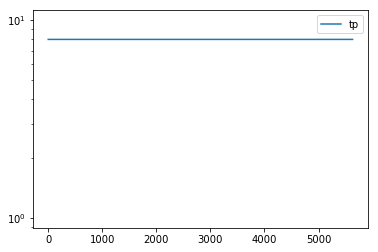

In [63]:
plt.cla()
plt.plot(total_p.T[2], label="tp")
plt.yscale("log")
plt.legend()
plt.show()

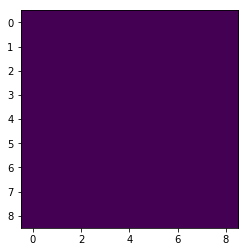

In [69]:
plt.imshow(_d)